# Computer vision - MNIST

In [2]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
#mnist.load_data?

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_train[0].shape

(28, 28)

In [7]:
%matplotlib inline
import matplotlib as mpl

In [8]:
import matplotlib.pyplot as plt

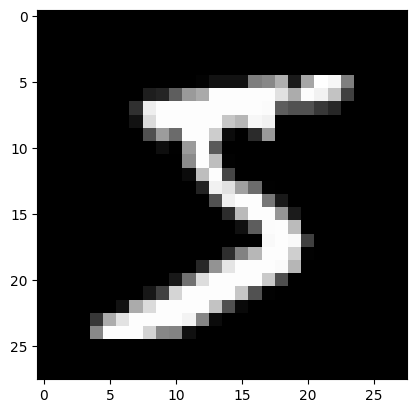

In [9]:
plt.imshow(x_train[0], cmap=plt.cm.gray, interpolation='nearest')

In [10]:
print(y_train[0])

5


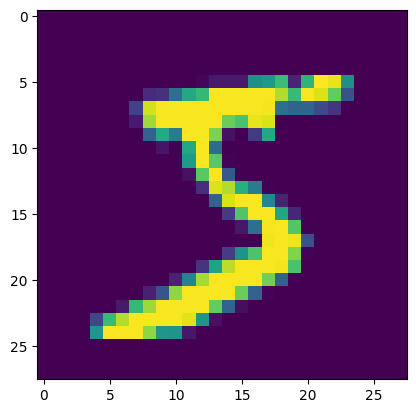

In [11]:
plt.imshow(x_train[0])

In [13]:
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)

print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

In [14]:
x_train, x_test = x_train/255.0, x_test/255.0

## Training model

In [16]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential()

#model.add(Dense(32, activation='relu', input_shape=(784,))) # <--- if the images are already flattened
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [17]:
# ignoring for now...
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

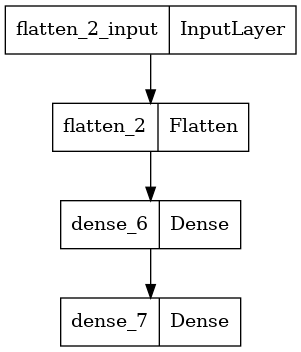

In [18]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

This is the image:

![model](model.png)

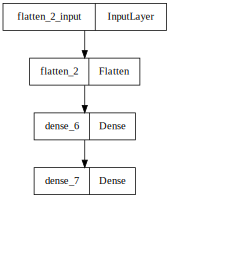

In [19]:
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [20]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               200960    
                                                                 
 dense_7 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [21]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Read about optimizers [here](https://towardsdatascience.com/understanding-rmsprop-faster-neural-network-learning-62e116fcf29a) and specifically about [Adam optimizer](https://towardsdatascience.com/adam-latest-trends-in-deep-learning-optimization-6be9a291375c)

In [22]:
class accuracy99Callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') > 0.999):
            print("\n\nWe reached 99.9% accuracy!\n")
            self.model.stop_training = True

In [24]:
%%time
# ~ 2 min
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), callbacks=[accuracy99Callback()])

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0045 - accuracy: 0.9986 - val_loss: 0.1038 - val_accuracy: 0.9825
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0064 - accuracy: 0.9977 - val_loss: 0.1073 - val_accuracy: 0.9806
Epoch 3/5
1853/1875 [============================>.] - ETA: 0s - loss: 0.0022 - accuracy: 0.9994

We reached 99.9% accuracy!

1875/1875 [==============================] - 5s 2ms/step - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.1047 - val_accuracy: 0.9836
CPU times: user 12.4 s, sys: 6.58 s, total: 19 s
Wall time: 14.6 s


In [27]:
model.save_weights('model.keras')
print(model.history.history)

{'loss': [0.004536597058176994, 0.006413214839994907, 0.0023012966848909855], 'accuracy': [0.9986333250999451, 0.9977499842643738, 0.9993833303451538], 'val_loss': [0.10379333794116974, 0.10731536895036697, 0.10472095757722855], 'val_accuracy': [0.9825000166893005, 0.9805999994277954, 0.9836000204086304]}


In [28]:
model.load_weights('model.keras')

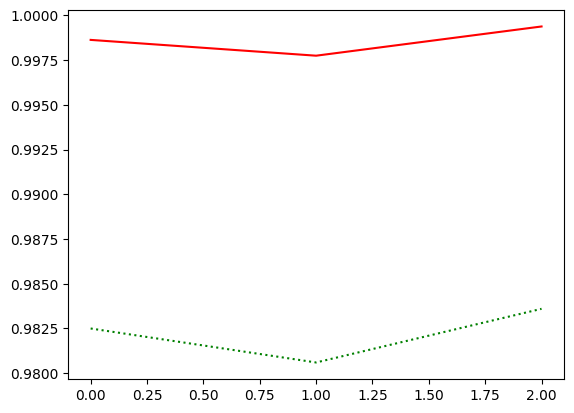

In [30]:
plt.plot(model.history.history['accuracy'], 'r-')
plt.plot(model.history.history['val_accuracy'], 'g:')

In [31]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1047 - accuracy: 0.9836


[0.10472095757722855, 0.9836000204086304]

Epoch 1/5
2813/2813 [==============================] - 10s 3ms/step - loss: 0.2275 - accuracy: 0.9321 - val_loss: 0.1189 - val_accuracy: 0.9642
Epoch 2/5
2813/2813 [==============================] - 10s 3ms/step - loss: 0.0945 - accuracy: 0.9706 - val_loss: 0.0987 - val_accuracy: 0.9698
Epoch 3/5
2813/2813 [==============================] - 10s 4ms/step - loss: 0.0604 - accuracy: 0.9813 - val_loss: 0.0960 - val_accuracy: 0.9710
Epoch 4/5
2813/2813 [==============================] - 9s 3ms/step - loss: 0.0439 - accuracy: 0.9857 - val_loss: 0.1085 - val_accuracy: 0.9683
Epoch 5/5
2813/2813 [==============================] - 10s 3ms/step - loss: 0.0319 - accuracy: 0.9894 - val_loss: 0.0928 - val_accuracy: 0.9741


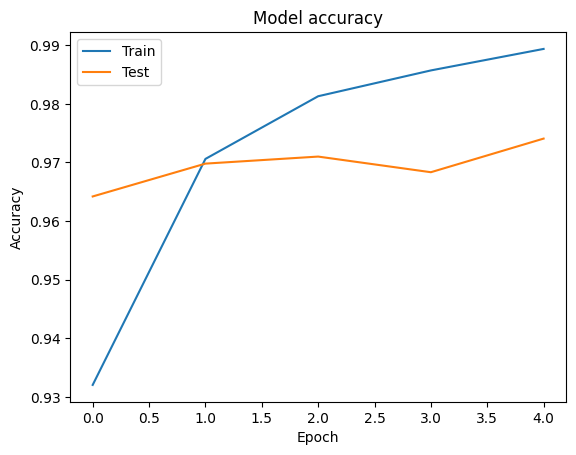

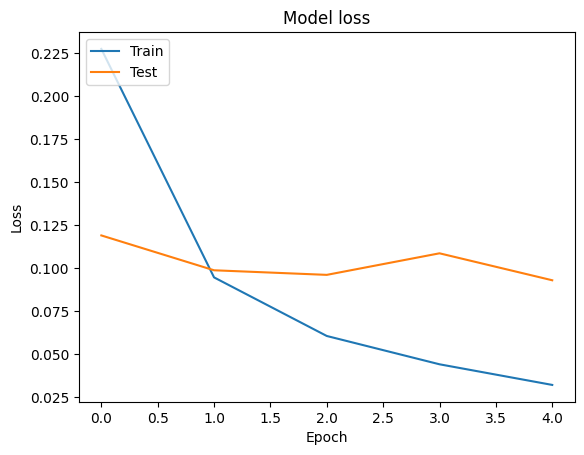

CPU times: user 41.3 s, sys: 25.5 s, total: 1min 6s
Wall time: 49.2 s


In [32]:
%%time
# ~30 seconds
import matplotlib.pyplot as plt

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train,
                    y_train,
                    validation_split=0.25,
                    epochs=5,
                    batch_size=16,
                    verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [33]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 256)               200960    
                                                                 
 dense_9 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
print(model.weights)

[<tf.Variable 'dense_8/kernel:0' shape=(784, 256) dtype=float32, numpy=
array([[ 7.11787641e-02,  5.89805543e-02,  4.02984396e-02, -4.74091917e-02, -7.45133609e-02,  6.65363371e-02, -2.32180841e-02, -3.16689909e-03,  5.35654426e-02,  7.05472380e-02, -7.50165060e-02,  4.90635633e-04, -4.76636253e-02, -7.16871694e-02,  4.76495549e-02,  6.85001910e-02,  4.38357741e-02,  2.62929872e-02,  3.57213020e-02, -7.02825487e-02,  4.41490486e-02, -5.42762130e-02, -7.18556717e-02,  7.21080154e-02,  1.64994597e-03,  5.21806329e-02,  1.04799867e-03, -7.58074448e-02,  3.16145867e-02,  2.92258784e-02, ..., -2.28861608e-02,  6.33141100e-02, -7.35458955e-02, -4.58066724e-02, -5.42198941e-02, -5.22576198e-02, -3.37586477e-02, -6.73886836e-02, -3.76292132e-02,  3.06987017e-02,  3.39877829e-02,  5.40652573e-02, -2.52502598e-02, -3.17112580e-02, -2.29170173e-03, -4.94917668e-02, -4.80921417e-02,  6.01830631e-02,  1.52808279e-02,  1.43596530e-03, -3.32707316e-02,  4.53147367e-02,  3.77783179e-03, -1.50511079e-0

In [35]:
last = model.get_layer(index=-1)

In [36]:
last.weights[1]

<tf.Variable 'dense_9/bias:0' shape=(10,) dtype=float32, numpy=array([-0.03935019, -0.14406967, -0.05680368, -0.04762543,  0.07552774,  0.02566108, -0.07365493, -0.08630025,  0.23156723,  0.0066475 ], dtype=float32)>

In [39]:
inp = x_test[0].reshape((1, 28, 28))
res = model.predict(inp)
print(x_test[0].shape)
print(inp.shape)
print(res)

1/1 [==============================] - 0s 11ms/step
(28, 28)
(1, 28, 28)
[[5.2980553e-08 1.6074313e-10 1.0107066e-07 2.5066503e-05 2.0190900e-15 2.1460386e-10 4.2189208e-12 9.9996448e-01 1.1665117e-10 1.0276085e-05]]


In [40]:
y_test[0]

7

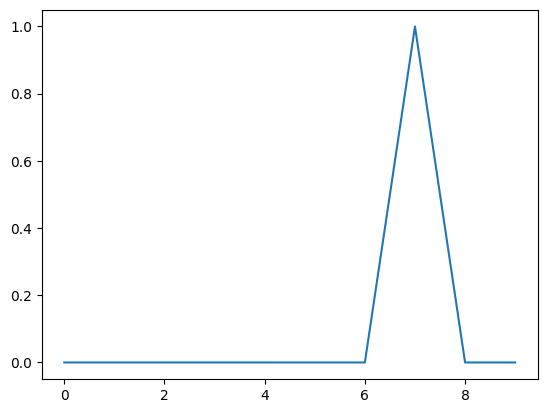

In [41]:
plt.plot(range(10), res[0])

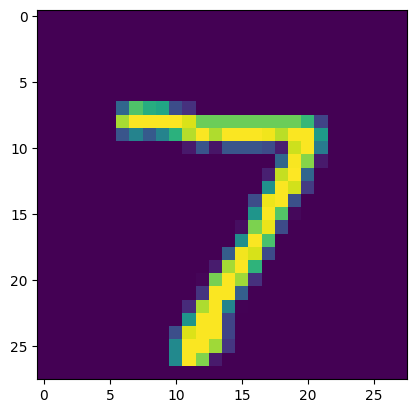

In [42]:
plt.imshow(x_test[0])